# TEXT CLUSTERING

## ASSIGNMENT I

### Bag of Words and TF-IDF

#### BOW

##### Step 1 : Mentokenisasi data, menghilangkan stop words dan melakukan stemming atau lemitasi.

In [5]:
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
import re

paragraph = """The news mentioned here is fake. Audience do not encourage fake news. Fake news is false or misleading"""
	

sentences = nltk.sent_tokenize(paragraph)
lemmatizer = WordNetLemmatizer()
	
corpus = []
	
for i in range(len(sentences)):
    sent = re.sub('[^a-zA-Z]', ' ', sentences[i])
    sent = sent.lower()
    sent= sent.split()
    sent = [lemmatizer.lemmatize(word) for word in sent if not word in set(stopwords.words('english'))]
    sent = ' '.join(sent)   
    corpus.append(sent)
print(corpus)

['news mentioned fake', 'audience encourage fake news', 'fake news false misleading']


##### Step 2: List semua kata unik
##### ['false', 'misleading', 'audience', 'encourage', 'mentioned', 'news', 'fake']

##### Step 3: Membuat sebuah dictionary dengan memetakan huruf menjadi angka. Kemudian urutkan kata dari tertinggi ke terendah.
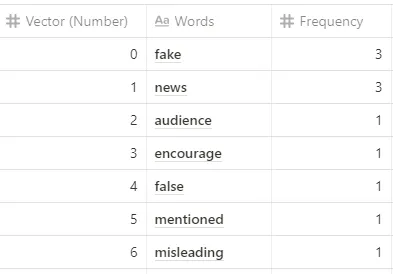

##### Step 4: Sekarang, membuat sebuah tabel untuk setiap kalimat, untuk setiap kata yang ada pada dictionary, isi dengan angka '1' jika tidak isi dengan '0'.
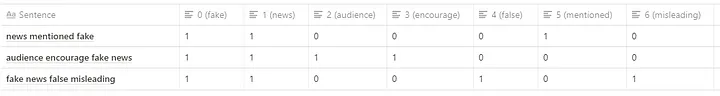

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
independentFeatures = cv.fit_transform(corpus).toarray()
print(independentFeatures)


[[0 0 1 0 1 0 1]
 [1 1 1 0 0 0 1]
 [0 0 1 1 0 1 1]]


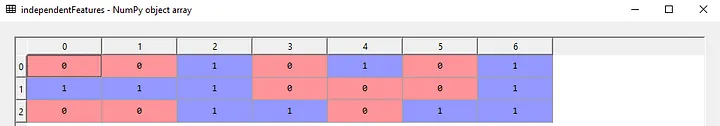

#### TF-IDF

##### Step 1 : Melalui stemming atau lemmatization, kita akan mengubah data dengan menghilangkan imbuhan kata atau mengembalikan kata-kata ke bentuk dasarnya. Setelah itu, kita akan mengambil semua kata unik dari data tersebut dan mengurutkannya berdasarkan seberapa sering kata-kata tersebut muncul. Tiga langkah ini mirip dengan apa yang kita lakukan dalam konsep BOW.
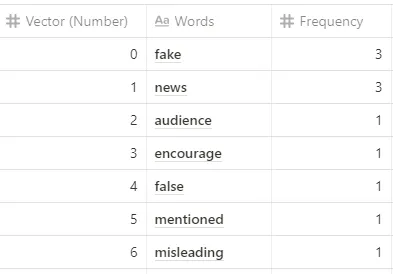

##### Step 2: Menghitung nilai frequency
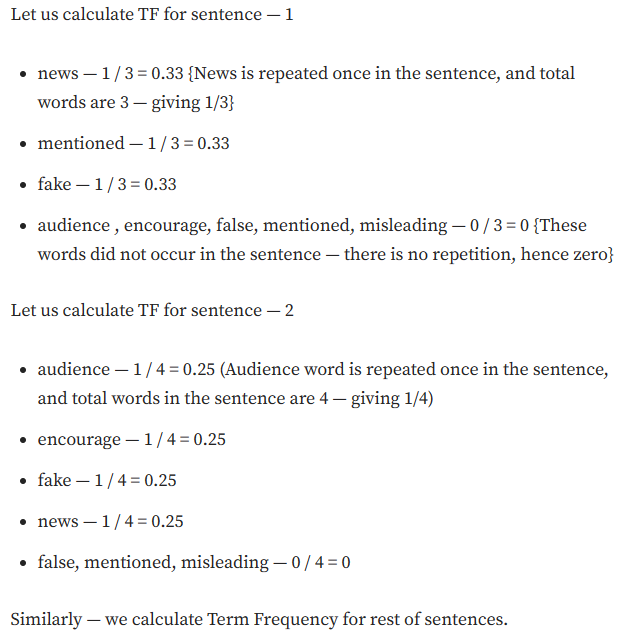
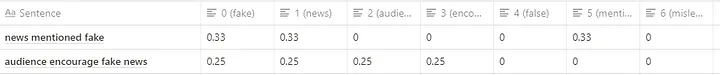

##### Step 3 : Menghitung IDF
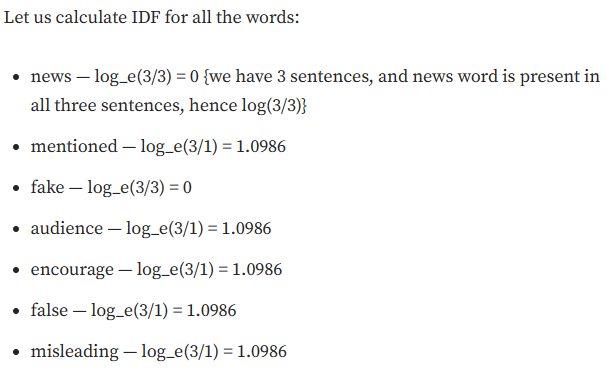

##### Step 5 : Menghitung vektor dokumen dengan mengalikan nilai TF (Term Frequency) dan IDF (Inverse Document Frequency), menggunakan modul TfidfVectorizer dari scikit-learn.

In [12]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer() 
independentFeatures_tfIDF = tfidf.fit_transform(corpus).toarray()
print(independentFeatures_tfIDF)

[[0.         0.         0.45329466 0.         0.76749457 0.
  0.45329466]
 [0.6088451  0.6088451  0.35959372 0.         0.         0.
  0.35959372]
 [0.         0.         0.35959372 0.6088451  0.         0.6088451
  0.35959372]]


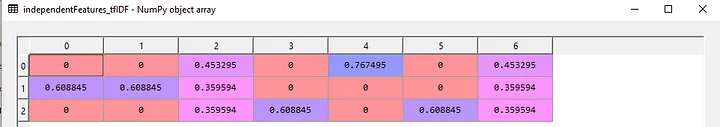

### Text Clustering with TF-IDF in Python

#### Dataset

In [13]:
# import the dataset from sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# import other required libs
import pandas as pd
import numpy as np

# string manipulation libs
import re
import string
import nltk
from nltk.corpus import stopwords

# viz libs
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
categories = [
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'alt.atheism',
 'soc.religion.christian',
 'talk.politics.mideast',
 'talk.politics.misc',
 'sci.med',
 'sci.space'
]
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))
df = pd.DataFrame(dataset.data, columns=["corpus"])
df

,corpus
0,\n\nJudging from past experience (the '87 Marc...
1,"\n\tSerum, actually, but plasma numbers are th..."
2,\nYou can add sysedit (& regedit) to a program...
3,\n\nI assume you are posting to encourage comm...
4,\n Why does the Center For Policy Research p...
...,...
5662,I just got a copy of Tobias' Managing Your Mon...
5663,"\nOwen only has one error so far, I believe. ..."
5664,SPEAKING OF VAT: Did anyone see CNN's report ...
5665,\n\nI recall reading in the recently revised e...


#### Preprocessing

In [16]:
stopwords.words("english")[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [17]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """This utility function sanitizes a string by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """

    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [18]:
df['cleaned'] = df['corpus'].apply(lambda x: preprocess_text(x, remove_stopwords=True))
df

,corpus,cleaned
0,\n\nJudging from past experience (the '87 Marc...,judging past experience march peace justice ma...
1,"\n\tSerum, actually, but plasma numbers are th...",serum actually plasma numbers whole blood numb...
2,\nYou can add sysedit (& regedit) to a program...,add sysedit regedit program group windows prog...
3,\n\nI assume you are posting to encourage comm...,assume posting encourage comments much history...
4,\n Why does the Center For Policy Research p...,center policy research pose unbelievably stupi...
...,...,...
5662,I just got a copy of Tobias' Managing Your Mon...,got copy tobias managing money v quicken wonde...
5663,"\nOwen only has one error so far, I believe. ...",owen one error far believe seriously underrepr...
5664,SPEAKING OF VAT: Did anyone see CNN's report ...,speaking vat anyone see cnn report yesterday q...
5665,\n\nI recall reading in the recently revised e...,recall reading recently revised edition yeast ...


#### TF-IDF Vectorization

In [19]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df['cleaned'])

In [20]:
X.toarray() 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Implementation of KMeans

In [26]:
# initialize kmeans with 5 centroids
kmeans = KMeans(n_clusters=5, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_
print(clusters)

[3 3 1 ... 3 3 3]


#### Dimensional Reduction and Visualization

In [27]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [34]:
print(x0,"\n")
print(x1)

[-0.03436276 -0.00653805  0.13378069 ...  0.00424843  0.00209608
  0.02796443] 

[ 0.00293822  0.01290263 -0.12306856 ... -0.00822601 -0.00020763
 -0.0198622 ]


In [35]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1
print(df)

                                                 corpus  \
0     \n\nJudging from past experience (the '87 Marc...   
1     \n\tSerum, actually, but plasma numbers are th...   
2     \nYou can add sysedit (& regedit) to a program...   
3     \n\nI assume you are posting to encourage comm...   
4     \n   Why does the Center For Policy Research p...   
...                                                 ...   
5662  I just got a copy of Tobias' Managing Your Mon...   
5663  \nOwen only has one error so far, I believe.  ...   
5664  SPEAKING OF VAT:  Did anyone see CNN's report ...   
5665  \n\nI recall reading in the recently revised e...   
5666  \n\nAre there any further stories to report on...   

                                                cleaned  cluster        x0  \
0     judging past experience march peace justice ma...        3 -0.034363   
1     serum actually plasma numbers whole blood numb...        3 -0.006538   
2     add sysedit regedit program group windows prog...  

In [29]:

def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
many,believe,know,say,like,think,one,would,god,people

Cluster 1
mail,dos,please,program,know,files,anyone,file,thanks,windows

Cluster 2
league,last,hockey,play,players,season,games,year,team,game

Cluster 3
could,also,time,space,get,know,like,think,would,one

Cluster 4
pitt,surrender,skepticism,intellect,geb,shameful,chastity,jxp,dsl,cadre


In [39]:
# map clusters to appropriate labels 
cluster_map = {0: "Religion", 1: "Technology", 2: "Sports", 3:"Science", 4:"Politics"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

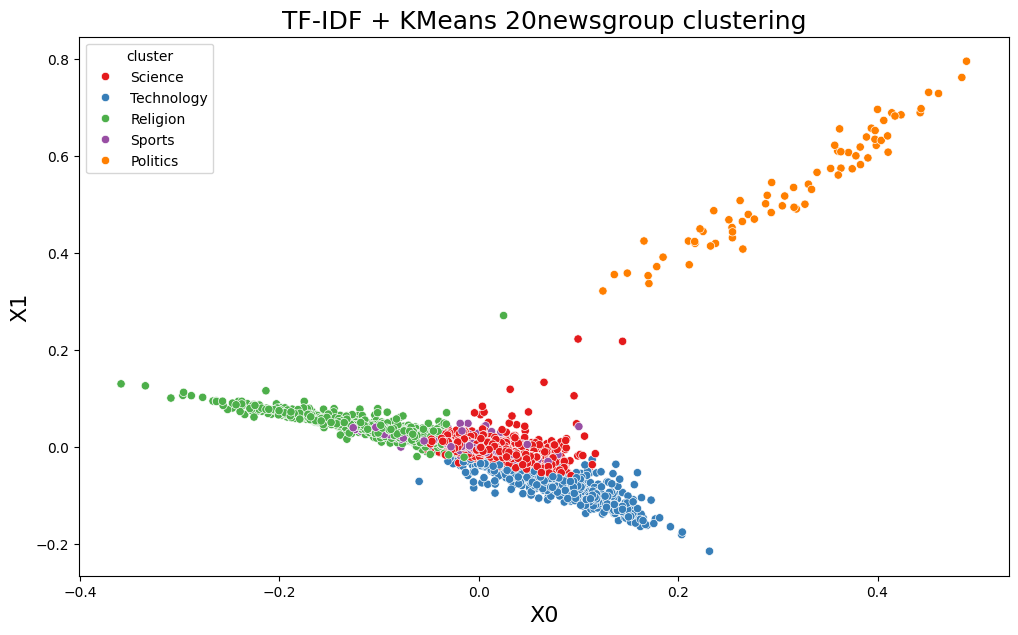

In [43]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans 20newsgroup clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="Set1")
plt.show()

## ASSIGNMENT II